In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sbn

In [219]:
# load data separately without concatenation
df_train = pd.read_csv("dataset/train.csv", sep=",", low_memory=False)
df_test = pd.read_csv("dataset/test.csv", sep=",", low_memory=False)

In [220]:
# dimensions of train dataset
print("#train samples = ", df_train.shape[0])
print("#train features = ", df_train.shape[1])

#train samples =  103904
#train features =  25


In [221]:
# dimensions of test dataset
print("#test samples = ", df_test.shape[0])
print("#test features = ", df_test.shape[1])

#test samples =  25976
#test features =  25


In [222]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(df_train)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 25 
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Numerical features: 
 ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [223]:
# drop columns that are not important
drop_cols = ["Unnamed: 0", "id"]
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)

In [224]:
# zero handling
# if delay is NaN then it is 0 min
for df in [df_train, df_test]:
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
    df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].fillna(0)

In [225]:
for df in [df_train, df_test]:
    # sum of delays (log of it)
    df['Total Delay Log'] = np.log1p(df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes'])

In [226]:
# features where 0 means "Not Applicable"
service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

In [227]:
# creating new columns with _NA for NaN
for col in service_cols:
    for df in [df_train, df_test]:
        df[col + '_NA'] = (df[col] == 0).astype(int)

In [228]:
metadata, num_cols, cat_cols = dp.get_metadata(df_train)

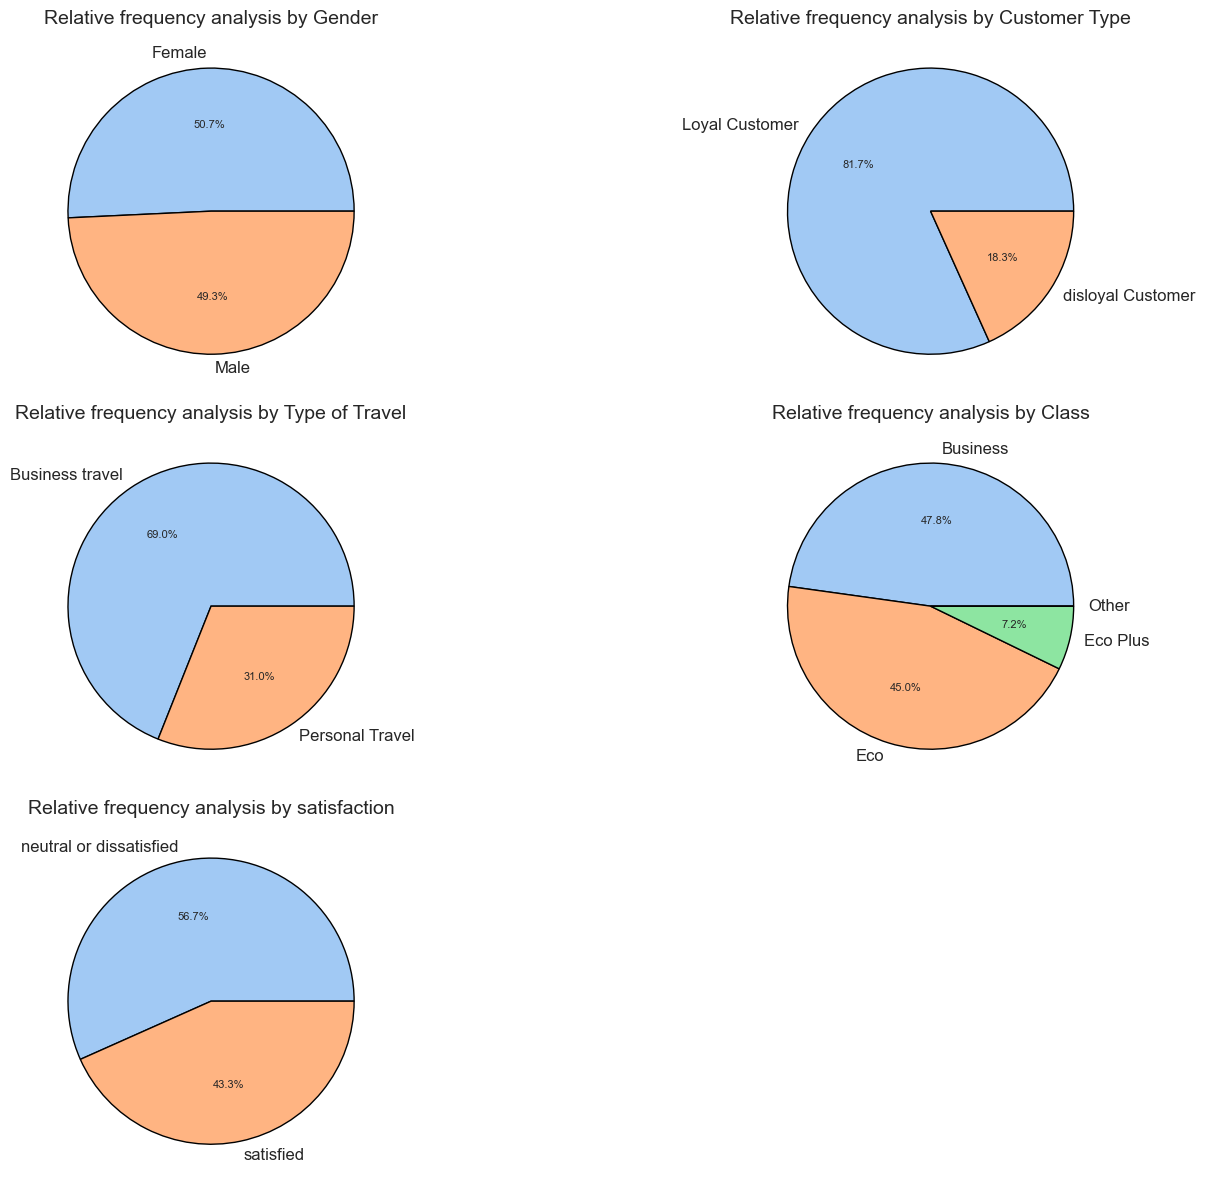

In [229]:
# pie chart to see the distribution
dp.iter_piechart(df_train, list(cat_cols))

   Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               5                3             5                       5  ...   
1               1                3             1              

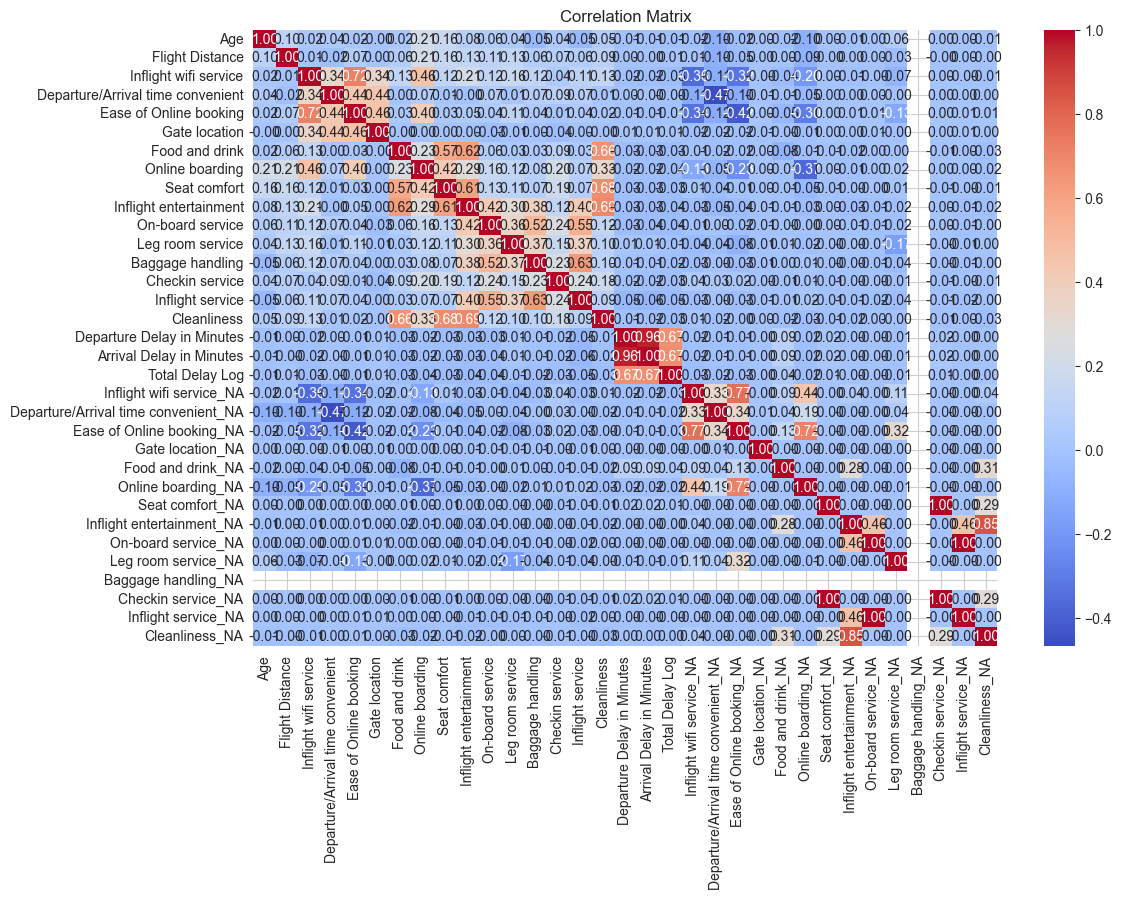

In [230]:
# Select only numeric columns
numeric_data = df_train.select_dtypes(include=['number'])

# Checking Numeric Data
print(numeric_data.head())

# Calculation of the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [231]:
# removing features with big correlation
for df in [df_train, df_test]:
    df.drop(columns=["Departure Delay in Minutes"], inplace=True)
    df.drop(columns=["Arrival Delay in Minutes"], inplace=True)

In [232]:
# manual mapping of 'Class' to save the order
class_map = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
for df in [df_train, df_test]:
    df['Class'] = df['Class'].map(class_map)

In [233]:
# other features (Gender, Travel Type, Customer Type)
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['Gender', 'Type of Travel', 'Customer Type']

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# train on 'train' and convert 'test'
df_train[categorical_features] = oe.fit_transform(df_train[categorical_features])

# only convert 'test'
df_test[categorical_features] = oe.transform(df_test[categorical_features])

In [234]:
df_train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Food and drink_NA,Online boarding_NA,Seat comfort_NA,Inflight entertainment_NA,On-board service_NA,Leg room service_NA,Baggage handling_NA,Checkin service_NA,Inflight service_NA,Cleanliness_NA
0,1.0,0.0,13,1.0,1,460,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,25,0.0,2,235,3,2,3,3,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,26,0.0,2,1142,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,25,0.0,2,562,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,61,0.0,2,214,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0


In [235]:
# making target value 0 and 1
target_map = {'neutral or dissatisfied': 0, 'satisfied': 1}
df_train['satisfaction'] = df_train['satisfaction'].map(target_map)
df_test['satisfaction'] = df_test['satisfaction'].map(target_map)

In [236]:
# split variables
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']

X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

In [237]:
print("X-train dim: ", X_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", X_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (103904, 35)
Y-train:  103904
X-test dim:  (25976, 35)
Y-test:  25976


In [238]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Food and drink_NA,Online boarding_NA,Seat comfort_NA,Inflight entertainment_NA,On-board service_NA,Leg room service_NA,Baggage handling_NA,Checkin service_NA,Inflight service_NA,Cleanliness_NA
0,1.0,0.0,13,1.0,1,460,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,25,0.0,2,235,3,2,3,3,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,26,0.0,2,1142,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,25,0.0,2,562,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,61,0.0,2,214,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,1.0,23,0.0,0,192,2,1,2,3,...,0,0,0,0,0,0,0,0,0,0
103900,1.0,0.0,49,0.0,2,2347,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
103901,1.0,1.0,30,0.0,2,1995,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
103902,0.0,1.0,22,0.0,0,1000,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0


In [239]:
y_train

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64